
Predicción del nivel de estrés
🌍 Contexto

Los niveles de estrés afectan directamente a la salud física y mental.

En este proyecto, trabajarás como si fueras parte del equipo de desarrollo de un sistema de monitoreo de estrés para deportistas de alto rendimiento o trabajadores en ambientes exigentes.

Se te ha encomendado diseñar un clasificador que, a partir de tres medidas fisiológicas, pueda predecir el nivel de estrés de una persona.

Para ello, deberás simular datos realistas, entrenar un modelo de aprendizaje automático y visualizar los resultados.



🎯 Objetivos

Simular datos fisiológicos (ritmo cardíaco, nivel de cortisol y conductancia de la piel).

Clasificar el nivel de estrés de las personas como:
🔵 Bajo, 🟠 Moderado o 🔴 Alto.

Entrenar un clasificador Random Forest.

Evaluar el rendimiento del modelo.

Realizar predicciones personalizadas.

Visualizar los datos y resultados con gráficos interpretables.



🛠️ Requisitos Técnicos

Debes usar:

NumPy para generar datos.

Pandas para manipular estructuras.

matplotlib.pyplot para visualizar.

sklearn para entrenamiento del modelo y métricas.

Programación orientada a objetos (clases bien definidas).



👨‍🔬 Parte 1: Clase para representar individuos

Crea una clase llamada Individual con los siguientes atributos:

Ritmo cardíaco (heart_rate) en pulsaciones por minuto.

Nivel de cortisol (cortisol_level) en µg/dL.

Conductancia de la piel (skin_conductance) en µS.

Nivel de estrés (stress_level): cadena de texto ('Bajo', 'Moderado' o 'Alto').

Incluye un método to_vector() que devuelva solo las tres primeras variables como lista.



🧪 Parte 2: Simulador de datos

Crea una clase StressDataGenerator que genere una lista de objetos Individual con valores aleatorios realistas:

Ritmo cardíaco: media 75, desviación estándar 15.

Cortisol: media 12, desviación estándar 4.

Conductancia: media 5, desviación estándar 1.5.

Clasifica los individuos según estas reglas:

🔴 Alto: si cualquiera de las tres medidas supera estos umbrales:

Ritmo cardíaco > 90

Cortisol > 18

Conductancia > 6.5

🟠 Moderado: si alguna supera:

Ritmo cardíaco > 70

Cortisol > 10

Conductancia > 4.5
pero no cumple los criterios de "Alto".

🔵 Bajo: si ninguna medida supera esos valores.



🤖 Parte 3: Clasificador con Random Forest

Crea una clase StressClassifier con los métodos:

fit(individuals) → entrena el modelo con datos.

predict(heart_rate, cortisol, conductance) → devuelve el nivel de estrés estimado.

evaluate(test_data) → imprime matriz de confusión e informe de clasificación.



🔍 Parte 4: Prueba y predicción personalizada

Genera 300 datos simulados.

Divide el conjunto en entrenamiento y prueba (70%-30%).

Evalúa el modelo con métricas de sklearn.

Predice el estrés de un caso con valores como:

Ritmo cardíaco: 95

Cortisol: 20

Conductancia: 7



📈 Parte 5: Visualización de los datos

Usa pandas para convertir los datos simulados a un DataFrame.

Genera un gráfico de dispersión con matplotlib:

Eje X: nivel de cortisol

Eje Y: ritmo cardíaco

Color de los puntos según el nivel de estrés

Usa colores representativos:

Verde → Bajo

Naranja → Moderado

Rojo → Alto

Agrega título, leyenda y cuadrícula.



✅ Ejemplo de uso

example = StressAnalysisExample()
example.run()


Salida esperada

📊 Matriz de confusión:
[[33  0  0]
 [ 0  2  1]
 [ 0  0 54]]
 
📝 Informe de clasificación:
              precision    recall  f1-score   support
 
        Alto       1.00      1.00      1.00        33
        Bajo       1.00      0.67      0.80         3
    Moderado       0.98      1.00      0.99        54
 
    accuracy                           0.99        90
   macro avg       0.99      0.89      0.93        90
weighted avg       0.99      0.99      0.99        90
 
 
🧠 Predicción para individuo personalizado:
  Ritmo cardíaco: 95, Cortisol: 20, Conductancia: 7
  → Nivel estimado de estrés: Alto









📊 Matriz de confusión:
[[31  0  0]
 [ 0  3  2]
 [ 1  0 53]]

📝 Informe de clasificación:
              precision    recall  f1-score   support

        Alto       0.97      1.00      0.98        31
        Bajo       1.00      0.60      0.75         5
    Moderado       0.96      0.98      0.97        54

    accuracy                           0.97        90
   macro avg       0.98      0.86      0.90        90
weighted avg       0.97      0.97      0.96        90


🧠 Predicción para individuo personalizado:
  Ritmo cardíaco: 95, Cortisol: 20, Conductancia: 7
  → Nivel estimado de estrés: Alto


C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


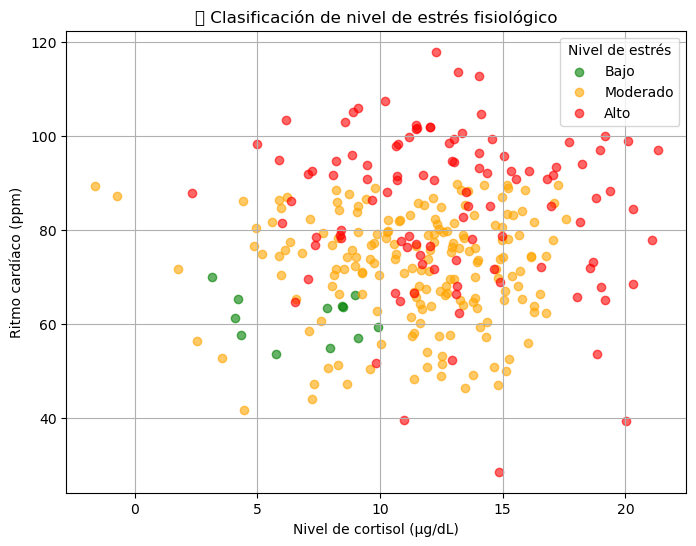

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

class Individual:
    def __init__(self, heart_rate, cortisol_level, skin_conductance, stress_level):
        self.heart_rate = heart_rate
        self.cortisol_level = cortisol_level
        self.skin_conductance = skin_conductance
        self.stress_level = stress_level

    def to_vector(self):
        return [self.heart_rate, self.cortisol_level, self.skin_conductance]

class StressDataGenerator:
    def __init__(self, n=300):
        self.n = n

    def generate(self):
        heart_rates = np.random.normal(75, 15, self.n)
        cortisol = np.random.normal(12, 4, self.n)
        conductance = np.random.normal(5, 1.5, self.n)

        data = []
        for hr, cort, sc in zip(heart_rates, cortisol, conductance):
            if hr > 90 or cort > 18 or sc > 6.5:
                level = "Alto"
            elif hr > 70 or cort > 10 or sc > 4.5:
                level = "Moderado"
            else:
                level = "Bajo"
            data.append(Individual(hr, cort, sc, level))
        return data

class StressClassifier:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=1)

    def fit(self, individuals):
        X = [i.to_vector() for i in individuals]
        y = [i.stress_level for i in individuals]
        self.model.fit(X, y)

    def predict(self, heart_rate, cortisol, conductance):
        return self.model.predict([[heart_rate, cortisol, conductance]])[0]

    def evaluate(self, test_data):
        X = [i.to_vector() for i in test_data]
        y_true = [i.stress_level for i in test_data]
        y_pred = self.model.predict(X)

        print("📊 Matriz de confusión:")
        print(confusion_matrix(y_true, y_pred))
        print("\n📝 Informe de clasificación:")
        print(classification_report(y_true, y_pred))

class StressAnalysisExample:
    def run(self):
        generator = StressDataGenerator()
        data = generator.generate()

        train, test = train_test_split(data, test_size=0.3, random_state=1)

        classifier = StressClassifier()
        classifier.fit(train)
        classifier.evaluate(test)

        # Predicción personalizada
        hr, cort, sc = 95, 20, 7
        pred = classifier.predict(hr, cort, sc)
        print(f"\n🧠 Predicción para individuo personalizado:")
        print(f"  Ritmo cardíaco: {hr}, Cortisol: {cort}, Conductancia: {sc}")
        print(f"  → Nivel estimado de estrés: {pred}")

        # Visualización
        df = pd.DataFrame({
            "Ritmo cardíaco": [i.heart_rate for i in data],
            "Cortisol": [i.cortisol_level for i in data],
            "Conductancia": [i.skin_conductance for i in data],
            "Estrés": [i.stress_level for i in data]
        })

        colores = {"Bajo": "green", "Moderado": "orange", "Alto": "red"}
        plt.figure(figsize=(8, 6))
        for nivel, color in colores.items():
            subset = df[df["Estrés"] == nivel]
            plt.scatter(subset["Cortisol"], subset["Ritmo cardíaco"], label=nivel, c=color, alpha=0.6)

        plt.xlabel("Nivel de cortisol (µg/dL)")
        plt.ylabel("Ritmo cardíaco (ppm)")
        plt.title("🧬 Clasificación de nivel de estrés fisiológico")
        plt.grid(True)
        plt.legend(title="Nivel de estrés")
        plt.show()

# Ejecutar ejemplo
example = StressAnalysisExample()
example.run()